In [151]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "serif"

from sklearn.linear_model import LinearRegression

# Warning
from yellowbrick.regressor import ResidualsPlot

In [152]:
base = pd.read_csv("../data/cars.csv")

base.head(10)

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16
5,6,9,10
6,7,10,18
7,8,10,26
8,9,10,34
9,10,11,17


In [153]:
base.shape

(50, 3)

In [154]:
base = base.drop(["Unnamed: 0"], axis = 1)

base.head(10)

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


In [155]:
x = base.iloc[:, 1].values
y = base.iloc[:, 0].values

x

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85])

In [156]:
correlation = np.corrcoef(x, y)

correlation

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [157]:
x = x.reshape(-1, 1)


In [158]:
x.shape

(50, 1)

In [159]:
modelo = LinearRegression()

modelo.fit(x, y)

LinearRegression()

In [160]:
# Where the line crosses the y axis

modelo.intercept_

8.283905641787172

In [161]:
# Inclination of the line

modelo.coef_

array([0.16556757])

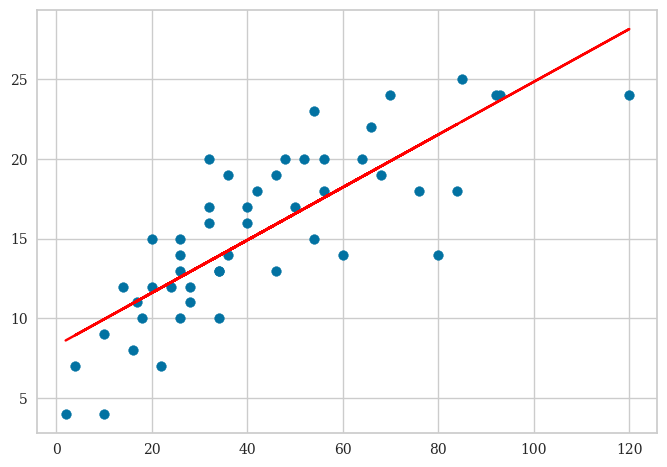

In [162]:
plt.scatter(x, y)
plt.plot(x, modelo.predict(x), color = "red")

In [163]:
# Predicting the speed if take 22 foots to stop
modelo.intercept_ + modelo.coef_ * 22

array([11.92639228])

In [164]:
modelo.predict([[22]])

array([11.92639228])

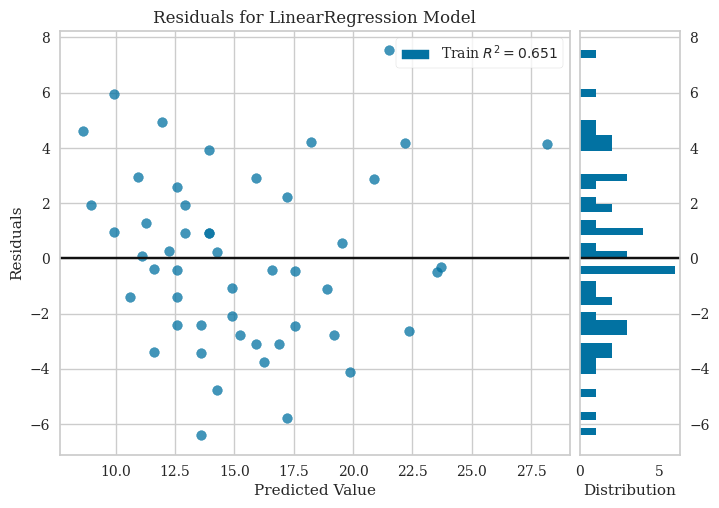

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [165]:
visualizador = ResidualsPlot(modelo)
visualizador.fit(x, y)
visualizador.poof()